<a href="https://colab.research.google.com/github/sakunisgithub/machine_learning/blob/master/0014_RL__Calculating_Value_Function_for_a_Policy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Set-up

Here we try to calculate the Value function for a given policy. The set-up is motivated from an example in the book "Artificial Intelligence : A Modern Approach" by Russell & Norvig. One may refer to Figures 17.1 and 21.1 of the book.

Suppose that an agent is situated in the $4 \times 3$ environment as shown in the figure below.

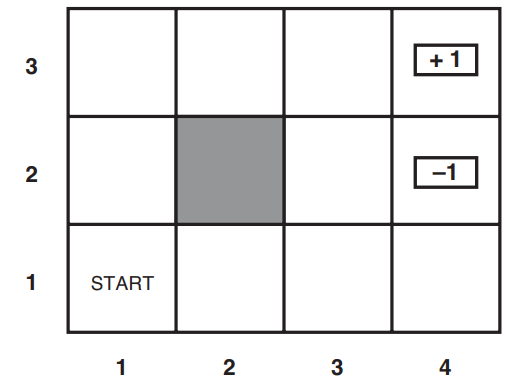

Beginning in the START state, it must choose an action at each time step. The interaction with the environment terminates when the agent reaches one of the goal states, marked $+1$ or $-1$. The actions available to the agent in each state are $\textit{Up, Down, Left}$ and $\textit{Right}$. The environment is fully observable, so that the agent always knows where it is.

The transition model of the environment is : the intended outcome occurs with probability $0.8$, but with probability $0.2$ the agent moves at right angles
to the intended direction. A collision with a wall results in no movement. Below is an illustration of stochastic movement of the agent.

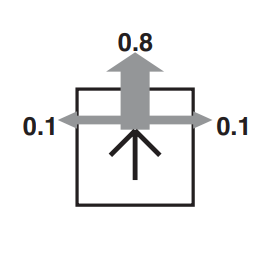

The two terminal states have reward $+1$ and $-1$, respectively, and all other states have a reward of $- 0.04$.

Following is a policy $\pi$ in this $4 \times 3$ world.

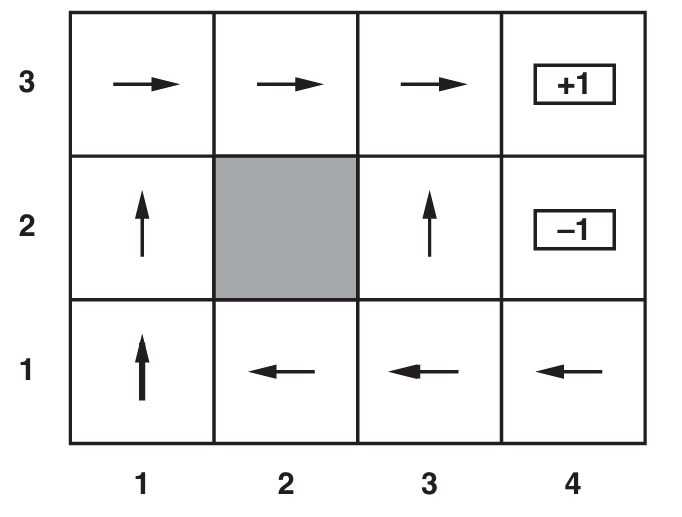

The policy $\pi$ happens to be the optimal policy with rewards $R(s) = -0.04$ in the non-terminal states and no discounting $\textit{i.e.}$ $\gamma = 1$.

We desire to calculate $V^{\pi}(s)$ $\textit{i.e.}$ value of a state $s$ for a given policy $\pi$, for all the states $s$.

# Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd

# State Space

In [ ]:
valid_states = [(i, j) for i in range(1, 5) for j in range(1, 4) if (i, j) != (2, 2)]

print(valid_states)

[(1, 1), (1, 2), (1, 3), (2, 1), (2, 3), (3, 1), (3, 2), (3, 3), (4, 1), (4, 2), (4, 3)]


# Policy Function

In [ ]:
def policy(state : tuple) :
  intended_up = [(1, 1), (1, 2), (3, 2)]
  intended_left = [(2, 1), (3, 1), (4, 1)]
  intended_right = [(1, 3), (2, 3), (3, 3)]

  if state in intended_up :
    return 'up'
  elif state in intended_left :
    return 'left'
  elif state in intended_right :
    return 'right'
  elif state == (4, 3) or state == (4, 2) :
    return None

In [ ]:
actions = [policy(state) for state in valid_states]

pi = {key:value for key, value in zip(valid_states, actions)}

print(pi)

{(1, 1): 'up', (1, 2): 'up', (1, 3): 'right', (2, 1): 'left', (2, 3): 'right', (3, 1): 'left', (3, 2): 'up', (3, 3): 'right', (4, 1): 'left', (4, 2): None, (4, 3): None}


# State Transition Probabilities

In [ ]:
def transition(state : tuple, action : str) :
  valid_states = [(i, j) for i in range(1, 5) for j in range(1, 4) if (i, j) != (2, 2)]

  transition_probabilities = {key : 0 for key in valid_states}

  if state == (4, 3) or state == (4, 2) :
    return transition_probabilities

  x, y = state

  intended = left90 = right90 = True

  if action == 'up' :
    if y+1 <= 3 and (x, y+1) != (2, 2) :
      transition_probabilities[(x, y+1)] = 0.8
    else :
      intended = False
      transition_probabilities[state] += 0.8

    if x-1 >= 1 and (x-1, y) != (2, 2) :
      transition_probabilities[(x-1, y)] = 0.1
    else :
      left90 = False
      transition_probabilities[state] += 0.1

    if x+1 <= 4 and (x+1, y) != (2, 2) :
      transition_probabilities[(x+1, y)] = 0.1
    else :
      right90 = False
      transition_probabilities[state] += 0.1


  if action == 'down' :
    if y-1 >= 1 and (x, y-1) != (2, 2) :
      transition_probabilities[(x, y-1)] = 0.8
    else :
      intended = False
      transition_probabilities[state] += 0.8

    if x+1 <= 4 and (x+1, y) != (2, 2) :
      transition_probabilities[(x+1, y)] = 0.1
    else :
      left90 = False
      transition_probabilities[state] += 0.1

    if x-1 >= 1 and (x-1, y) != (2, 2) :
      transition_probabilities[(x-1, y)] = 0.1
    else :
      right90 = False
      transition_probabilities[state] += 0.1


  if action == 'left' :
    if x-1 >= 1 and (x-1, y) != (2, 2) :
      transition_probabilities[(x-1, y)] = 0.8
    else :
      intended = False
      transition_probabilities[state] += 0.8

    if y-1 >= 1 and (x, y-1) != (2, 2) :
      transition_probabilities[(x, y-1)] = 0.1
    else :
      left90 = False
      transition_probabilities[state] += 0.1

    if y+1 <= 3 and (x, y+1) != (2, 2) :
      transition_probabilities[(x, y+1)] = 0.1
    else :
      right90 = False
      transition_probabilities[state] += 0.1


  if action == 'right' :
    if x+1 <= 4 and (x+1, y) != (2, 2) :
      transition_probabilities[(x+1, y)] = 0.8
    else :
      intended = False
      transition_probabilities[state] += 0.8

    if y+1 <= 3 and (x, y+1) != (2, 2) :
      transition_probabilities[(x, y+1)] = 0.1
    else :
      left90 = False
      transition_probabilities[state] += 0.1

    if y-1 >= 1 and (x, y-1) != (2, 2) :
      transition_probabilities[(x, y-1)] = 0.1
    else :
      right90 = False
      transition_probabilities[state] += 0.1

  return transition_probabilities

In [ ]:
tp = transition((1, 1), 'up')

print({key:value for key,value in zip(tp.keys(), tp.values()) if value != 0})

{(1, 1): 0.1, (1, 2): 0.8, (2, 1): 0.1}


In [ ]:
tp = transition((1, 1), 'down')

print({key:value for key,value in zip(tp.keys(), tp.values()) if value != 0})

{(1, 1): 0.9, (2, 1): 0.1}


In [ ]:
tp = transition((1, 1), 'left')

print({key:value for key,value in zip(tp.keys(), tp.values()) if value != 0})

{(1, 1): 0.9, (1, 2): 0.1}


In [ ]:
tp = transition((1, 1), 'right')

print({key:value for key,value in zip(tp.keys(), tp.values()) if value != 0})

{(1, 1): 0.1, (1, 2): 0.1, (2, 1): 0.8}


In [ ]:
tp = transition((4, 3), 'left')

print({key:value for key,value in zip(tp.keys(), tp.values())})

{(1, 1): 0, (1, 2): 0, (1, 3): 0, (2, 1): 0, (2, 3): 0, (3, 1): 0, (3, 2): 0, (3, 3): 0, (4, 1): 0, (4, 2): 0, (4, 3): 0}


# Reward Function

In [ ]:
def reward(state : tuple) :

  if state == (4, 3) :
    return 1
  elif state == (4, 2) :
    return -1
  else :
    return -0.04

In [ ]:
print(reward((1, 1)))

-0.04


In [ ]:
print(reward((4, 2)))

-1


In [ ]:
rewards = np.array([reward(state) for state in valid_states])

print(rewards)

[-0.04 -0.04 -0.04 -0.04 -0.04 -0.04 -0.04 -0.04 -0.04 -1.    1.  ]


# Discount Factor

In [ ]:
gamma = 1

# Value Function by Bellman Equations

For a fixed policy $\pi$, its value function $V^{\pi}$ satisfies the $\textit{Bellman Equations}$

$$\forall s \in S, \,\,\, V^{\pi}(s) = R(s) + \gamma \cdot \sum \limits_{s' \in S} P_{s,\pi(s)}(s') V^{\pi}(s').$$

Here $|S| = 11$. So, these $11$ equations form a linear system of equations which we will solve by iterative approach.

We initialize the values of all non-terminal states to $0$ and the values of the terminal states to $-1$ and $+1$ as specified in the problem earlier.

In [ ]:
V = np.zeros(9).reshape((9, 1))
V = np.append(V, [-1, 1])

print(V)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  1.]


We create an $11 \times 11$ matrix that will preserve all the state transition probabilities.

In [ ]:
P = np.zeros((11, 11))

for i in range(11) :
  state = valid_states[i]
  P[i, :] = list(transition(state=state, action=policy(state)).values())

In [ ]:
matrix_P = pd.DataFrame(P, index = valid_states, columns = valid_states)
matrix_P

,"(1, 1)","(1, 2)","(1, 3)","(2, 1)","(2, 3)","(3, 1)","(3, 2)","(3, 3)","(4, 1)","(4, 2)","(4, 3)"
"(1, 1)",0.1,0.8,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(1, 2)",0.0,0.2,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(1, 3)",0.0,0.1,0.1,0.0,0.8,0.0,0.0,0.0,0.0,0.0,0.0
"(2, 1)",0.8,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(2, 3)",0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.8,0.0,0.0,0.0
"(3, 1)",0.0,0.0,0.0,0.8,0.0,0.1,0.1,0.0,0.0,0.0,0.0
"(3, 2)",0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.8,0.0,0.1,0.0
"(3, 3)",0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.0,0.0,0.8
"(4, 1)",0.0,0.0,0.0,0.0,0.0,0.8,0.0,0.0,0.1,0.1,0.0
"(4, 2)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We now perform iterations until convergence with $\textbf{synchronous}$ updates.

In [ ]:
while True :
  # new V
  V_new = rewards + gamma * np.dot(P, V)

  # check convergence
  if np.max(np.abs(V_new - V)) < 0.0001 :
    V = V_new
    break

  # update
  V = V_new

In [ ]:
pd.DataFrame([valid_states, np.round(V, 3)]).T

,0,1
0,"(1, 1)",0.705
1,"(1, 2)",0.762
2,"(1, 3)",0.812
3,"(2, 1)",0.655
4,"(2, 3)",0.868
5,"(3, 1)",0.611
6,"(3, 2)",0.66
7,"(3, 3)",0.918
8,"(4, 1)",0.388
9,"(4, 2)",-1.0


Result given in the book is as follows.

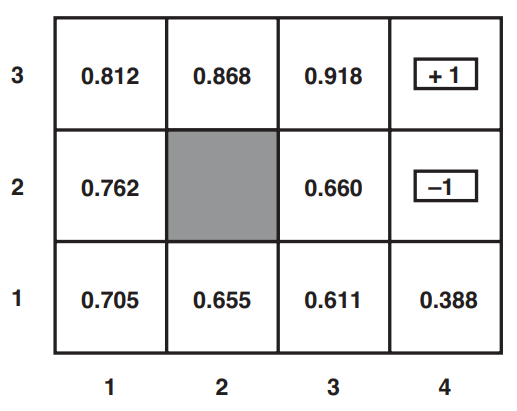